<a href="https://colab.research.google.com/github/nattrio/NF-kB-prediction/blob/main/NF_%CE%BAB_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Workshop 
## Compound screening in drug discovery
<img src="fig/research_intro.png">

## Step 1) Importing dataset

In [ ]:
import pandas as pd

In [ ]:
df_active=pd.read_csv('df_active.csv', header=0)

In [ ]:
df_inactive=pd.read_csv('df_inactive.csv', header=0)

In [ ]:
df_active.head()

,cid,class,smiles
0,31307,1,C[C@]12C[C@@H]([C@]3([C@H]([C@@H]1C[C@H]([C@@]...
1,5074,1,CC1=C(C(=O)N2C=CSC2=N1)CCN3CCC(=C(C4=CC=C(C=C4...
2,5754,1,C[C@]12CCC(=O)C=C1CC[C@@H]3[C@@H]2[C@H](C[C@]4...
3,2708,1,C1=CC(=CC=C1CCCC(=O)O)N(CCCl)CCCl
4,2284,1,C1=CC(=CC=C1C(CC(=O)O)CN)Cl


In [ ]:
df1=df_active.sample(5312)

In [ ]:
df2=df_inactive.sample(100000)

In [ ]:
df=pd.concat([df1, df2])

In [ ]:
df = df.head(100000)

## Step 2) Getting chemical fingerprints from chemical structures (smiles) with rdkit

### Fingerprint
- Apply a kernel to a molecule to generate a bit vector.
- Each fingerprint bit corresponds to a fragment of the molecule.
- Molecules that are similar have a lot of fragments in common.
<img src="fig/fingerprint.png">

In [ ]:
# conda install -c rdkit rdkit

In [ ]:
from rdkit import Chem

from datetime import datetime
start = datetime.now()

In [ ]:
mols = [ Chem.MolFromSmiles(x) for x in df['smiles'] ]

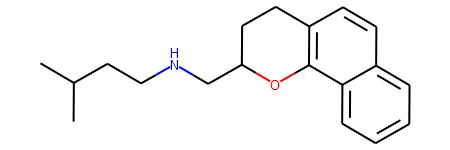

In [ ]:
mols[0]

In [ ]:
fps = [ Chem.RDKFingerprint(x) for x in mols ]

In [ ]:
fps[0].ToBitString()

'000010000000100000000000010100000000010000001000100010011000010101000001101101000000100000001010000101010000110010000010100100100101000000000110000000000100100011100011001001100000100010000000001011100000000111000011100000010001110001010000001000000000000100000100000110110010101001000000000000110010010001101101010000010000000000110001001000001110000001001000000000011000000000000000010011100000010110010100001011000000000010011000100101001101010100000100010011001000011101100100001100100001100000110111000010010100010000110100000000001000100010001100000001110011010000000000000101001000010011001101010101001011000010010100000000001001000000101001101001011000011000000100000011010000010010000010000000001001011000001001000101000101100100100000100001100000100000000001001001000011010000000000111110010000000001011000000010011010011000100100001001010110101101000011010010000001110001000010000000011010000010000000000100000101000101100110000001000010000110100111000000000000111101010000010100000000000

In [ ]:
bits = [ list(x.ToBitString()) for x in fps ]

In [ ]:
type(bits)

list

In [ ]:
# bits[0]

## Step 3) Building a machine learning model to predict activity

In [ ]:
X=pd.DataFrame(bits)

In [ ]:
X.shape

(100000, 2048)

In [ ]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
1,1,1,1,1,1,1,0,0,0,1,...,0,1,1,1,1,1,0,1,1,1
2,1,0,1,1,0,1,0,1,1,0,...,0,0,0,1,0,0,1,0,0,1
3,1,1,0,0,0,0,1,0,1,1,...,0,0,0,1,0,0,1,1,0,1
4,0,0,0,0,0,1,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
Y=df['class']

In [ ]:
Y.head()

5057    1
3687    1
4622    1
5226    1
715     1
Name: class, dtype: int64

In [ ]:
X.shape, Y.shape

((100000, 2048), (100000,))

## Splitting dataset

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, stratify=Y )

In [ ]:
Y_train[Y_train==1].shape, Y_train[Y_train==0].shape

((4250,), (75750,))

In [ ]:
Y_test[Y_test==1].shape, Y_test[Y_test==0].shape
# แสดงว่า stratify มีผล

((1062,), (18938,))

In [ ]:
from sklearn import tree

### An example of a tree
<img src="fig/tree_example.png">

### Building Decision Tree Model

In [ ]:
clf=tree.DecisionTreeClassifier()

In [ ]:
clf=clf.fit(X_train, Y_train)

### Using the Model for Prediction

In [ ]:
Y_train_pred = clf.predict(X_train)

In [ ]:
Y_train_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Performance evaluation

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
print( confusion_matrix(Y_train, Y_train_pred) )
print( classification_report(Y_train, Y_train_pred) )

[[75742     8]
 [  343  3907]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     75750
           1       1.00      0.92      0.96      4250

    accuracy                           1.00     80000
   macro avg       1.00      0.96      0.98     80000
weighted avg       1.00      1.00      1.00     80000



#### Confusion matrix
<img src="fig/confusion_matrix.jpg">

#### Evaluation Metrices
<img src="fig/metric.jpeg">

### Testing our model with test dataset

In [ ]:
Y_test_pred = clf.predict(X_test)

In [ ]:
print( confusion_matrix(Y_test, Y_test_pred) )
print( classification_report(Y_test, Y_test_pred) )

[[18145   793]
 [  514   548]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.97     18938
           1       0.41      0.52      0.46      1062

    accuracy                           0.93     20000
   macro avg       0.69      0.74      0.71     20000
weighted avg       0.94      0.93      0.94     20000



In [ ]:
print( accuracy_score(Y_test, Y_test_pred) )

0.93465


In [ ]:
stop = datetime.now()

### Visualizing our Tree

In [ ]:
# import matplotlib.pyplot as plt

In [ ]:
# tree.plot_tree(clf, filled=True)

In [ ]:
# !conda install -c conda-forge python-graphviz
# !pip install graphviz
# conda install graphviz
# conda install python-graphviz
# pip install pydotplus

In [ ]:
# import graphviz

In [ ]:
# dot_data = tree.export_graphviz(clf, out_file=None)

In [ ]:
# import pydotplus

In [ ]:
# graph = pydotplus.graph_from_dot_data(dot_data)

In [ ]:
# from IPython.display import Image 

In [ ]:
# Image(graph.create_png())

In [ ]:
# graph.write_pdf('tree.pdf')

In [ ]:
all600=pd.read_csv('all600.csv', header=0)
all600

,Unnamed: 0,class,CID,smiles
0,1,1,1001,CCCCCCCCCCCCCC[C@H](C(=O)N[C@H]([C@@H](/C=C/CC...
1,2,1,1002,CCCCCCCCCCCCCCCC[C@H](C(=O)N[C@H]([C@@H](/C=C/...
2,3,1,1003,OC(=O)CC[Ge](=O)O[Ge](=O)CCC(=O)O
3,4,1,9999,CCCCCCCCCC
4,5,1,1005,OC/C(=C/CC[C@H]([C@H]1CC[C@@]2([C@]1(C)CC=C1C2...
...,...,...,...,...
595,596,1,999999,CCCCCCC
596,597,1,999999,CCCCCCC
597,598,1,999999,CCCCCCC
598,599,1,999999,CCCCCCC


In [ ]:
new_mols = [ Chem.MolFromSmiles(x) for x in all600['smiles'] ]
new_fps = [ Chem.RDKFingerprint(x) for x in new_mols ]
new_bits = [ list(x.ToBitString()) for x in new_fps  ]
all600_input = pd.DataFrame(new_bits)
all600_input

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,1,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,1,1,0,0,1
1,1,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,1,1,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
596,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
597,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
598,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
all600_pred = clf.predict(all600_input)
all600_pred

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
all600["predict"] = all600_pred
all600

,Unnamed: 0,class,CID,smiles,predict
0,1,1,1001,CCCCCCCCCCCCCC[C@H](C(=O)N[C@H]([C@@H](/C=C/CC...,1
1,2,1,1002,CCCCCCCCCCCCCCCC[C@H](C(=O)N[C@H]([C@@H](/C=C/...,1
2,3,1,1003,OC(=O)CC[Ge](=O)O[Ge](=O)CCC(=O)O,0
3,4,1,9999,CCCCCCCCCC,0
4,5,1,1005,OC/C(=C/CC[C@H]([C@H]1CC[C@@]2([C@]1(C)CC=C1C2...,0
...,...,...,...,...,...
595,596,1,999999,CCCCCCC,0
596,597,1,999999,CCCCCCC,0
597,598,1,999999,CCCCCCC,0
598,599,1,999999,CCCCCCC,0


In [ ]:
all600_count = all600.groupby(["predict"]).count()
all600_count

,Unnamed: 0,class,CID,smiles
predict,,,,
0,466,466,466,466
1,134,134,134,134


In [ ]:
all600 = all600[["CID","predict"]]
all600.to_csv('all600_pred.csv', index=False)

In [ ]:
print('Time:', stop - start) 

Time: 0:04:13.777674
